In [2]:
import pandas as pd
df = pd.read_csv("final_data.csv")
df.head(10)

,gvkey,fyear,cusip,conm,at,capx,ceq,ch,csho,dt,...,ISIN,GenderRatio,NationalityMix,NumberDirectors,log_at,capx_to_at_ratio,rd,rd_missing,SnP500,leverage
0,1004,2003,00036110,AAR CORP,709.292,10.286,301.684,41.010,32.245,250.162,...,US0003611052,1.000,0.0,8.0,6.564267,0.014502,NaN,1,NaN,0.352693
1,1004,2004,00036110,AAR CORP,732.230,13.033,314.744,40.508,32.586,229.494,...,US0003611052,1.000,0.0,8.0,6.596095,0.017799,NaN,1,NaN,0.313418
2,1004,2013,00036110,AAR CORP,2199.500,26.500,999.500,89.200,39.560,634.000,...,US0003611052,1.000,0.0,11.0,7.695985,0.012048,NaN,1,NaN,0.288247
3,1004,2015,00036110,AAR CORP,1442.100,88.400,865.800,31.200,34.515,148.100,...,US0003611052,0.917,0.0,12.0,7.273856,0.061299,NaN,1,0.0,0.102697
4,1004,2016,00036110,AAR CORP,1504.100,33.600,914.200,10.300,34.354,157.300,...,US0003611052,0.923,0.0,13.0,7.315950,0.022339,NaN,1,0.0,0.104581
5,1004,2017,00036110,AAR CORP,1524.700,22.000,936.300,31.100,34.716,177.200,...,US0003611052,0.917,0.0,12.0,7.329553,0.014429,NaN,1,0.0,0.116220
6,1004,2018,00036110,AAR CORP,1517.200,17.400,905.900,21.300,34.788,141.700,...,US0003611052,0.917,0.0,12.0,7.324622,0.011468,NaN,1,0.0,0.093396
7,1004,2019,00036110,AAR CORP,2079.000,23.600,902.600,404.700,35.097,684.600,...,US0003611052,0.917,0.0,12.0,7.639642,0.011352,NaN,1,NaN,0.329293
8,1045,2014,02376R10,AMERICAN AIRLINES GROUP INC,43771.000,5311.000,2021.000,994.000,697.475,17904.000,...,US02376R1023,0.909,0.0,11.0,10.686727,0.121336,NaN,1,NaN,0.409038
9,1045,2015,02376R10,AMERICAN AIRLINES GROUP INC,48415.000,6151.000,5635.000,390.000,624.622,20561.000,...,US02376R1023,0.846,0.0,13.0,10.787565,0.127047,NaN,1,1.0,0.424682


In [3]:
df.shape

(17214, 53)

In [4]:
df.columns

Index(['gvkey', 'fyear', 'cusip', 'conm', 'at', 'capx', 'ceq', 'ch', 'csho',
       'dt', 'ni', 'sale', 'txdb', 'xrd', 'prcc_c', 'gsector', 'sic', 'age',
       'log_age', 'tobinsq', 'tobinsq_adj', 'hhi', 'cik',
       'corrected_state_incorp', 'sbf', 'dualclass', 'kld_governance',
       'kld_community', 'kld_diversity', 'kld_employeerelations',
       'kld_environment', 'kld_humanrights', 'kld_product', 'kld_index',
       'average_current_RRI', 'gind', 'gsubind', 'ggroup', 'tic.x', 'e_index',
       'e_index_mSB', 'S.Pindex', 'Ticker', 'ISIN', 'GenderRatio',
       'NationalityMix', 'NumberDirectors', 'log_at', 'capx_to_at_ratio', 'rd',
       'rd_missing', 'SnP500', 'leverage'],
      dtype='object')

## total companies

In [5]:
df.gvkey.nunique()

1791

## companies per year

In [6]:
companies_per_year = df.groupby('fyear').gvkey.nunique()
companies_per_year

fyear
1995      84
1996      89
1997      98
1998     112
1999     125
2000     118
2001     229
2002     256
2003     597
2004     645
2005     616
2006     667
2007     735
2008     795
2009     827
2010     915
2011     924
2012     967
2013     988
2014     969
2015    1112
2016    1184
2017    1239
2018    1456
2019    1467
Name: gvkey, dtype: int64

<Axes: xlabel='fyear', ylabel='n companies'>

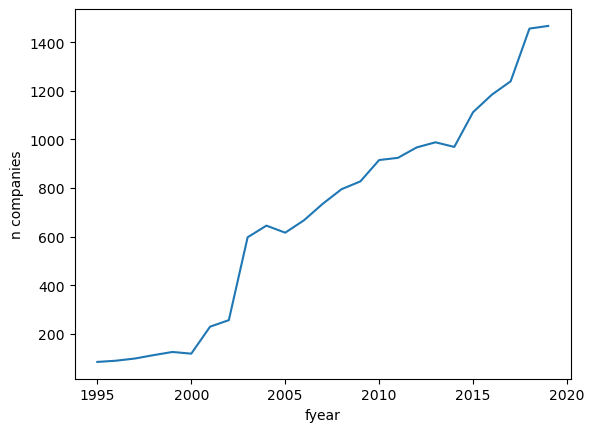

In [7]:
companies_per_year.plot(ylabel="n companies")

## years per company

In [8]:
years_per_company = df.groupby('gvkey').fyear.nunique().sort_values()
years_per_company

gvkey
328795     1
34882      1
34873      1
34854      1
34578      1
          ..
4213      25
31846     25
25279     25
4066      25
9778      25
Name: fyear, Length: 1791, dtype: int64

<Axes: xlabel='Years', ylabel='n companies'>

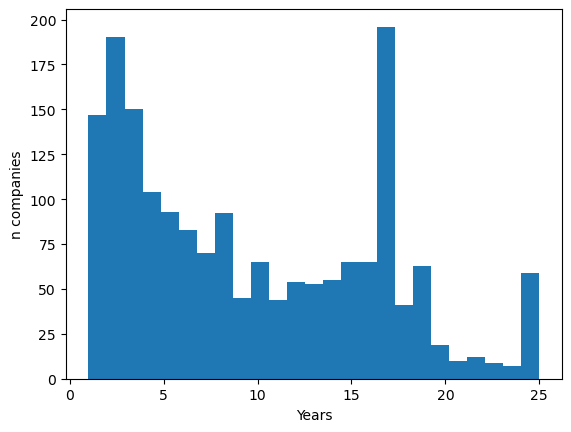

In [9]:
years_per_company.plot(kind="hist", bins=25, xlabel="Years", ylabel="n companies")

## staggered board?
### only staggered, never staggered, both

In [10]:
df_sbf = df.groupby('gvkey')['sbf'].agg(set= lambda x: list(set(x)))
df_sbf

,set
gvkey,
1004,[1]
1045,[0]
1075,"[0, 1]"
1161,[0]
1209,"[0, 1]"
...,...
264416,[0]
266214,[0]
287462,[1]


[Text(0, 0, 'staggered'), Text(1, 0, 'not staggered'), Text(2, 0, 'both')]

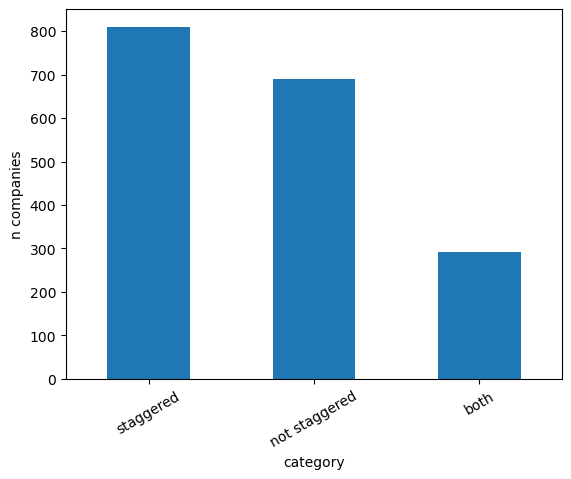

In [11]:
ax = df_sbf["set"].value_counts().plot(kind="bar", ylabel="n companies", xlabel="category", rot=30)
ax.set_xticklabels(["staggered", "not staggered", "both"])


## kld index per company

In [12]:
kld_per_company = df.groupby('gvkey')["kld_index"].agg(mean="mean")
kld_per_company

,mean
gvkey,
1004,-0.045581
1045,0.027216
1075,0.594655
1161,-0.020927
1209,0.263663
...,...
264416,-0.069444
266214,-0.151042
287462,-0.099065


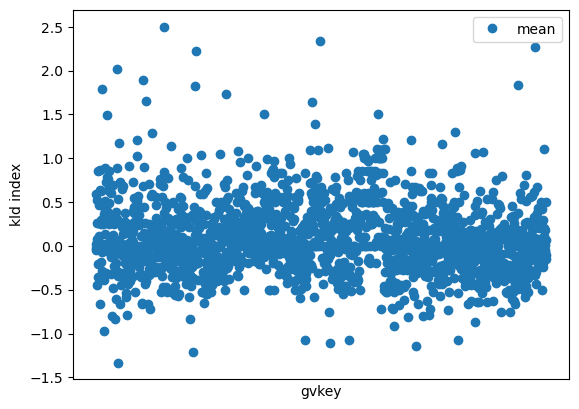

In [13]:
kld_per_company.reset_index(drop=True, inplace=True)
ax = kld_per_company.plot(kind="line", ylabel="kld index", xlabel="gvkey", style='o')
ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 

## kld per sbf & company

In [14]:
kld_per_sbf_and_company = df.groupby(["gvkey", "sbf"])["kld_index"].agg(mean="mean")
kld_per_sbf_and_company

mean
gvkey  sbf          
1004   1   -0.045581
1045   0    0.027216
1075   0    0.717602
       1    0.366327
1161   0   -0.020927
...              ...
264416 0   -0.069444
266214 0   -0.151042
287462 1   -0.099065
315318 0    0.071429
328795 1    0.500000

[2083 rows x 1 columns]

[Text(1, 0, 'Staggered (1157 data points)'),
 Text(2, 0, 'Not Staggered (1113 data points)')]

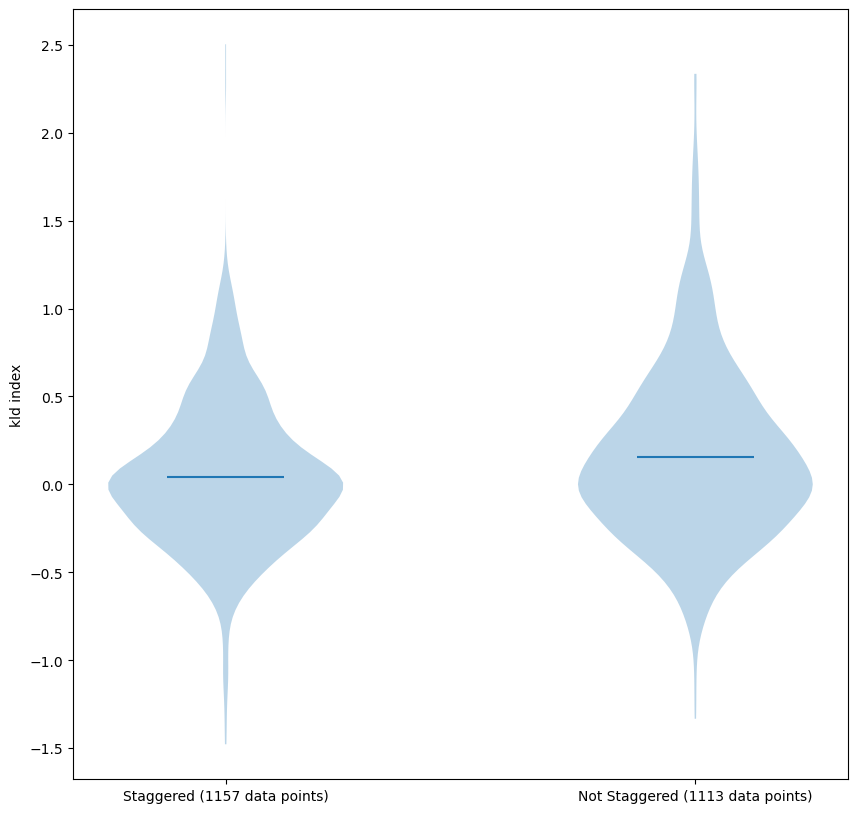

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10))

kld_sbf = kld_per_sbf_and_company[kld_per_sbf_and_company.index.isin([1], level=1)].values.squeeze(1)
kld_no_sbf = kld_per_sbf_and_company[kld_per_sbf_and_company.index.isin([0], level=1)].values.squeeze(1)

axes.violinplot(dataset = [kld_sbf, kld_no_sbf], showextrema=False, showmeans=True)
axes.set_ylabel("kld index")
axes.set_xticks([1, 2])
axes.set_xticklabels(["Staggered (1157 data points)", "Not Staggered (1113 data points)"])

## Fixed Effects
### reproducing Julie's results with PanelOLS

In [16]:
df["fyear"] = pd.to_datetime(df["fyear"], format='%Y')
df.set_index(["gvkey", "fyear"], inplace=True)
df

cusip                   conm        at    capx  \
gvkey  fyear                                                           
1004   2003-01-01  00036110               AAR CORP   709.292  10.286   
       2004-01-01  00036110               AAR CORP   732.230  13.033   
       2013-01-01  00036110               AAR CORP  2199.500  26.500   
       2015-01-01  00036110               AAR CORP  1442.100  88.400   
       2016-01-01  00036110               AAR CORP  1504.100  33.600   
...                     ...                    ...       ...     ...   
287462 2018-01-01  36116M10        FUTUREFUEL CORP   471.155   4.867   
       2019-01-01  36116M10        FUTUREFUEL CORP   586.505   6.971   
315318 2018-01-01  28618M10  ELEMENT SOLUTIONS INC  9401.500  28.400   
       2019-01-01  28618M10  ELEMENT SOLUTIONS INC  4324.400  29.700   
328795 2019-01-01  03965310             ARCOSA INC  2302.500  85.400   

                        ceq       ch     csho        dt       ni      sale  \
gvkey  fyear                                                                 
1004   2003-01-01   301.684   41.010   32.245   250.162    3.504   651.958   
       2004-01-01   314.744   40.508   32.586   229.494   15.453   747.848   
       2013-01-01   999.500   89.200   39.560   634.000   72.900  2035.000   
       2015-01-01   865.800   31.200   34.515   148.100   47.700  1662.600   
       2016-01-01   914.200   10.300   34.354   157.300   56.500  1767.600   
...                     ...      ...      ...       ...      ...       ...   
287462 2018-01-01   389.078  214.972   43.743     0.000   53.158   291.018   
       2019-01-01   467.098  243.331   43.743     1.557   88.181   205.226   
315318 2018-01-01  2109.200      NaN  288.974  5351.000 -324.400  1961.000   
       2019-01-01  2220.900      NaN  250.151  1583.400   92.200  1835.900   
328795 2019-01-01  1790.400  240.400   48.300   126.300  113.300  1736.900   

                   ...          ISIN  GenderRatio  NationalityMix  \
gvkey  fyear       ...                                              
1004   2003-01-01  ...  US0003611052        1.000             0.0   
       2004-01-01  ...  US0003611052        1.000             0.0   
       2013-01-01  ...  US0003611052        1.000             0.0   
       2015-01-01  ...  US0003611052        0.917             0.0   
       2016-01-01  ...  US0003611052        0.923             0.0   
...                ...           ...          ...             ...   
287462 2018-01-01  ...  US36116M1062        1.000             0.0   
       2019-01-01  ...  US36116M1062        0.889             0.0   
315318 2018-01-01  ...  US28618M1062        0.857             0.0   
       2019-01-01  ...  US28618M1062        0.889             0.0   
328795 2019-01-01  ...  US0396531008        0.889             0.0   

                   NumberDirectors    log_at  capx_to_at_ratio        rd  \
gvkey  fyear                                                               
1004   2003-01-01              8.0  6.564267          0.014502       NaN   
       2004-01-01              8.0  6.596095          0.017799       NaN   
       2013-01-01             11.0  7.695985          0.012048       NaN   
       2015-01-01             12.0  7.273856          0.061299       NaN   
       2016-01-01             13.0  7.315950          0.022339       NaN   
...                            ...       ...               ...       ...   
287462 2018-01-01              8.0  6.155187          0.010330  0.012109   
       2019-01-01              9.0  6.374181          0.011886  0.015549   
315318 2018-01-01              7.0  9.148625          0.003021  0.022591   
       2019-01-01              9.0  8.372029          0.006868  0.022986   
328795 2019-01-01              9.0  7.741751          0.037090       NaN   

                   rd_missing  SnP500  leverage  
gvkey  fyear                                     
1004   2003-01-01           1     NaN  0.352693  
       2004-01-01           1    

In [17]:
from linearmodels.panel import PanelOLS
mod = PanelOLS(dependent=df["kld_index"], exog=df["sbf"], entity_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              kld_index   R-squared:                        0.0662
Estimator:                   PanelOLS   R-squared (Between):             -1.0534
No. Observations:               17214   R-squared (Within):               0.0662
Date:                Thu, Nov 09 2023   R-squared (Overall):             -0.3665
Time:                        19:54:18   Log-likelihood                -1.074e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1093.5
Entities:                        1791   P-value                           0.0000
Avg Obs:                       9.6114   Distribution:                 F(1,15422)
Min Obs:                       1.0000                                           
Max Obs:                       25.000   F-statistic (robust):             273.67
                            

### reproducing Julie's results with OLS (demeaned)

In [18]:
import statsmodels.api as sm

sbf_mean = df.groupby('gvkey')['sbf'].mean().reset_index()
sbf_mean.rename(columns={'sbf': 'sbf_mean'}, inplace=True)
sbf_mean

,gvkey,sbf_mean
0,1004,1.000000
1,1045,0.000000
2,1075,0.350000
3,1161,0.000000
4,1209,0.733333
...,...,...
1786,264416,0.000000
1787,266214,0.000000
1788,287462,1.000000
1789,315318,0.000000


In [19]:
df = pd.merge(df, sbf_mean, on='gvkey', how='left')
df['sbf_demeaned'] = df['sbf'] - df['sbf_mean']
df

,gvkey,cusip,conm,at,capx,ceq,ch,csho,dt,ni,...,NationalityMix,NumberDirectors,log_at,capx_to_at_ratio,rd,rd_missing,SnP500,leverage,sbf_mean,sbf_demeaned
0,1004,00036110,AAR CORP,709.292,10.286,301.684,41.010,32.245,250.162,3.504,...,0.0,8.0,6.564267,0.014502,NaN,1,NaN,0.352693,1.0,0.0
1,1004,00036110,AAR CORP,732.230,13.033,314.744,40.508,32.586,229.494,15.453,...,0.0,8.0,6.596095,0.017799,NaN,1,NaN,0.313418,1.0,0.0
2,1004,00036110,AAR CORP,2199.500,26.500,999.500,89.200,39.560,634.000,72.900,...,0.0,11.0,7.695985,0.012048,NaN,1,NaN,0.288247,1.0,0.0
3,1004,00036110,AAR CORP,1442.100,88.400,865.800,31.200,34.515,148.100,47.700,...,0.0,12.0,7.273856,0.061299,NaN,1,0.0,0.102697,1.0,0.0
4,1004,00036110,AAR CORP,1504.100,33.600,914.200,10.300,34.354,157.300,56.500,...,0.0,13.0,7.315950,0.022339,NaN,1,0.0,0.104581,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17209,287462,36116M10,FUTUREFUEL CORP,471.155,4.867,389.078,214.972,43.743,0.000,53.158,...,0.0,8.0,6.155187,0.010330,0.012109,0,0.0,0.000000,1.0,0.0
17210,287462,36116M10,FUTUREFUEL CORP,586.505,6.971,467.098,243.331,43.743,1.557,88.181,...,0.0,9.0,6.374181,0.011886,0.015549,0,0.0,0.002655,1.0,0.0
17211,315318,28618M10,ELEMENT SOLUTIONS INC,9401.500,28.400,2109.200,NaN,288.974,5351.000,-324.400,...,0.0,7.0,9.148625,0.003021,0.022591,0,NaN,0.569164,0.0,0.0
17212,315318,28618M10,ELEMENT SOLUTIONS INC,4324.400,29.700,2220.900,NaN,250.151,1583.400,92.200,...,0.0,9.0,8.372029,0.006868,0.022986,0,NaN,0.366155,0.0,0.0


In [20]:
esg_score_mean = df.groupby('gvkey')['kld_index'].mean().reset_index()
esg_score_mean.rename(columns={'kld_index': 'kld_index_mean'}, inplace=True)
esg_score_mean

,gvkey,kld_index_mean
0,1004,-0.045581
1,1045,0.027216
2,1075,0.594655
3,1161,-0.020927
4,1209,0.263663
...,...,...
1786,264416,-0.069444
1787,266214,-0.151042
1788,287462,-0.099065
1789,315318,0.071429


In [21]:
df = pd.merge(df, esg_score_mean, on='gvkey', how='left')
df['kld_index_demeaned'] = df['kld_index'] - df['kld_index_mean']
df

,gvkey,cusip,conm,at,capx,ceq,ch,csho,dt,ni,...,log_at,capx_to_at_ratio,rd,rd_missing,SnP500,leverage,sbf_mean,sbf_demeaned,kld_index_mean,kld_index_demeaned
0,1004,00036110,AAR CORP,709.292,10.286,301.684,41.010,32.245,250.162,3.504,...,6.564267,0.014502,NaN,1,NaN,0.352693,1.0,0.0,-0.045581,0.045581
1,1004,00036110,AAR CORP,732.230,13.033,314.744,40.508,32.586,229.494,15.453,...,6.596095,0.017799,NaN,1,NaN,0.313418,1.0,0.0,-0.045581,-0.487753
2,1004,00036110,AAR CORP,2199.500,26.500,999.500,89.200,39.560,634.000,72.900,...,7.695985,0.012048,NaN,1,NaN,0.288247,1.0,0.0,-0.045581,-0.196843
3,1004,00036110,AAR CORP,1442.100,88.400,865.800,31.200,34.515,148.100,47.700,...,7.273856,0.061299,NaN,1,0.0,0.102697,1.0,0.0,-0.045581,-0.454419
4,1004,00036110,AAR CORP,1504.100,33.600,914.200,10.300,34.354,157.300,56.500,...,7.315950,0.022339,NaN,1,0.0,0.104581,1.0,0.0,-0.045581,0.045581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17209,287462,36116M10,FUTUREFUEL CORP,471.155,4.867,389.078,214.972,43.743,0.000,53.158,...,6.155187,0.010330,0.012109,0,0.0,0.000000,1.0,0.0,-0.099065,0.670493
17210,287462,36116M10,FUTUREFUEL CORP,586.505,6.971,467.098,243.331,43.743,1.557,88.181,...,6.374181,0.011886,0.015549,0,0.0,0.002655,1.0,0.0,-0.099065,0.670493
17211,315318,28618M10,ELEMENT SOLUTIONS INC,9401.500,28.400,2109.200,NaN,288.974,5351.000,-324.400,...,9.148625,0.003021,0.022591,0,NaN,0.569164,0.0,0.0,0.071429,0.000000
17212,315318,28618M10,ELEMENT SOLUTIONS INC,4324.400,29.700,2220.900,NaN,250.151,1583.400,92.200,...,8.372029,0.006868,0.022986,0,NaN,0.366155,0.0,0.0,0.071429,0.000000


In [22]:
model = sm.OLS(df["kld_index_demeaned"], df["sbf_demeaned"])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     kld_index_demeaned   R-squared (uncentered):                   0.066
Model:                            OLS   Adj. R-squared (uncentered):              0.066
Method:                 Least Squares   F-statistic:                              1221.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):                   2.05e-258
Time:                        19:54:19   Log-Likelihood:                         -10744.
No. Observations:               17214   AIC:                                  2.149e+04
Df Residuals:                   17213   BIC:                                  2.150e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sbf_demeaned    -0.5227      0.015    -34.936      0.000      -0.552      -0.493
==============================================================================
Omnibus:                     1741.558   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6948.791
Skew:                           0.451   Prob(JB):                         0.00
Kurtosis:                       5.979   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### reproducing Julie's results with OLS (dummy variables)

In [23]:
df_dummies = pd.get_dummies(df[["sbf", "gvkey"]], columns=["gvkey"])
df_dummies

,sbf,gvkey_1004,gvkey_1045,gvkey_1075,gvkey_1161,gvkey_1209,gvkey_1230,gvkey_1234,gvkey_1254,gvkey_1266,...,gvkey_260893,gvkey_264193,gvkey_264265,gvkey_264387,gvkey_264395,gvkey_264416,gvkey_266214,gvkey_287462,gvkey_315318,gvkey_328795
0,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17209,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
17210,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
17211,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
17212,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
model = sm.OLS(df[["kld_index"]], df_dummies.astype(float))
results = model.fit()
results.params.iloc[0]

-0.5227037665467625